In [2]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D 
from keras.datasets import mnist
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Daniel\anaconda3\envs\tensor\lib

# Define the Convolutional Autoencoder  Model

In [4]:
input = Input(shape=(28,28,1), name='input')

x = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name='conv_1')(input)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_2')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_3')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_4')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_5')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8, kernel_size=(3,3), activation='relu', name='conv_6')(x)
x = UpSampling2D(size=(2,2))(x)

output = Convolution2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid', name='output')(x)

model = Model(inputs=input, outputs=output, name='CAE')

In [5]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

# Load MNIST Dataset

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [8]:
model.fit(x_train, x_train, batch_size=32, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1635: 1s -
Epoch 2/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1245
Epoch 3/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1170
Epoch 4/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1129
Epoch 5/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1101
Epoch 6/50
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1084: 5
Epoch 7/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1073
Epoch 8/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1055
Epoch 9/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1048
Epoch 10/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1041
Epoch 11/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1033
Epoch 12/50
60000/60000 [==================

In [9]:
out_images = model.predict(x_test)

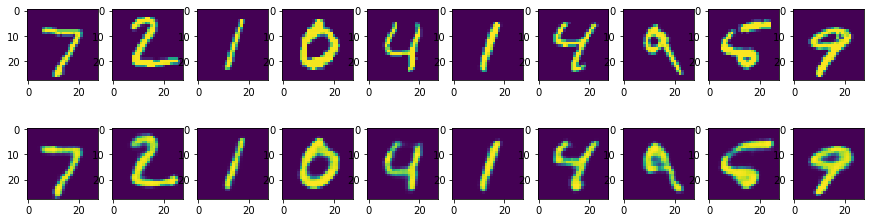

In [10]:
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(out_images[i].reshape(28, 28))
    
plt.show()